In [2]:
using PyPlot
using CSV
using DataFrames

In [3]:
initial = CSV.read("/Users/mmbell/Development/scythe/SWslab_test/gridded_out_0.0.csv", DataFrame, header=1)
output = CSV.read("/Users/mmbell/Development/scythe/SWslab_test/gridded_out_1800.0.csv", DataFrame, header=1)

,r,l,x,y,v,wb,vb,ub
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,5.55112e-17,-0.361698,-5.55112e-17,-2.77556e-17
2,0.0,0.00697357,0.0,0.0,5.55112e-17,-0.361698,-5.55112e-17,-2.77556e-17
3,0.0,0.0139471,0.0,0.0,5.55112e-17,-0.361698,-5.55112e-17,-2.77556e-17
4,0.0,0.0209207,0.0,0.0,5.55112e-17,-0.361698,-5.55112e-17,-2.77556e-17
5,0.0,0.0278943,0.0,0.0,5.55112e-17,-0.361698,-5.55112e-17,-2.77556e-17
6,0.0,0.0348678,0.0,0.0,5.55112e-17,-0.361698,-5.55112e-17,-2.77556e-17
7,0.0,0.0418414,0.0,0.0,5.55112e-17,-0.361698,-5.55112e-17,-2.77556e-17
8,0.0,0.048815,0.0,0.0,5.55112e-17,-0.361698,-5.55112e-17,-2.77556e-17
9,0.0,0.0557885,0.0,0.0,5.55112e-17,-0.361698,-5.55112e-17,-2.77556e-17


In [6]:
radius = reshape(output.r,901,150)[1,:]
lambda = reshape(output.l,901,150)[:,1]
u = reshape(output.u,901,150)'
v = reshape(output.v,901,150)'
ub = reshape(output.ub,901,150)'
vb = reshape(output.vb,901,150)'
wb = reshape(output.wb,901,150)'
hr = reshape(output.h_r,901,150)'

150×901 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0          0.0          0.0          …  0.0          0.0
 0.000120064  0.000120064  0.000120064     0.000120064  0.000120064
 0.000239497  0.000239497  0.000239497     0.000239497  0.000239497
 0.000358274  0.000358274  0.000358274     0.000358274  0.000358274
 0.000476924  0.000476924  0.000476924     0.000476924  0.000476924
 0.000596528  0.000596528  0.000596528  …  0.000596528  0.000596528
 0.000717924  0.000717924  0.000717924     0.000717924  0.000717924
 0.00084011   0.00084011   0.00084011      0.00084011   0.00084011
 0.000959883  0.000959883  0.000959883     0.000959883  0.000959883
 0.00107429   0.00107429   0.00107429      0.00107429   0.00107429
 0.00118488   0.00118488   0.00118488   …  0.00118488   0.00118488
 0.00129964   0.00129964   0.00129964      0.00129964   0.00129964
 0.00142875   0.00142875   0.00142875      0.00142875   0.00142875
 ⋮                                      ⋱               ⋮
 3.818e-5     3

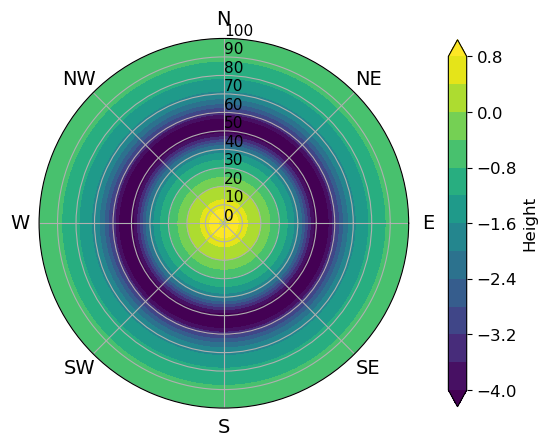

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/mmbell/.julia/packages/PyCall/L0fLP/src/numpy.jl:67
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


In [7]:
ax = plt.subplot(111, projection="polar");
plt.contourf(lambda, radius, ub, levels=(16), extend="both");
cb = plt.colorbar(fraction=0.037, pad=0.08);
cb.set_label("Height", size=12)
cb.ax.tick_params(labelsize=12)
ax.set_rlabel_position(90)
ax.set_rticks(0:10000:100000)
ax.set_yticklabels(0:10:100, fontsize=11)
ax.set_xticklabels(["E", "NE", "N", "NW", "W", "SW", "S", "SE"], fontsize=14)
ax.set_rmax(100000)
plt.savefig("shallow_water_test.png")

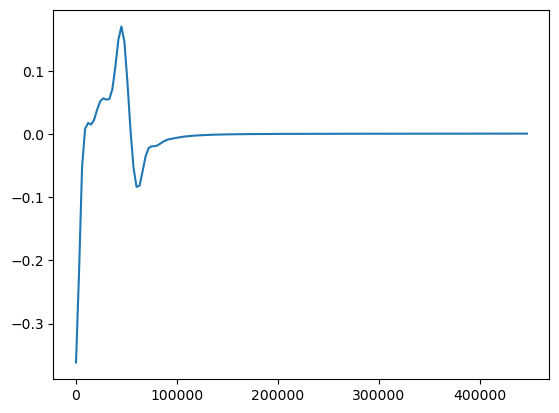

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x16f956c70>

In [8]:
ax = plt.subplot(111);
#plt.contour(lambda, radius, v, levels=(10));
plt.plot(radius,wb[:,1])
#plt.plot(radius,vb[:,1])